<a href="https://colab.research.google.com/github/katariyap/whalewisdom_data/blob/master/Copy_of_Whalewisdom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!ls
%cd /content/gdrive/MyDrive/Project 3 - WhaleWisdom Analysis


gdrive	sample_data
/content/gdrive/MyDrive/Project 3 - WhaleWisdom Analysis


In [4]:
!git clone https://github.com/katariyap/whalewisdom_data.git


fatal: destination path 'whalewisdom_data' already exists and is not an empty directory.


In [5]:
!ls whalewisdom_data/data/

combine_q32021-q22019.csv


In [6]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
#pd.options.plotting.backend = "plotly"
full = pd.read_csv('whalewisdom_data/data/combine_q32021-q22019.csv',parse_dates=True)
full.head()
#selecting only current quater
full.dtypes

Stock                       object
Symbol                      object
Type                       float64
Shares Held                float64
Market Value               float64
% of Portfolio             float64
Previous % of Portfolio    float64
Ranking                    float64
Change in shares           float64
% Change                   float64
Change Type                 object
% Ownership                 object
Qtr first owned             object
sector                      object
source_type                 object
source_date                 object
Avg Price                  float64
Recent Price               float64
dtype: object

In [30]:
#import os
#base = os.path.basename('/root/dir/sub/renaissance_technologies_llc-q4_2019-2021-07-10_11_11_34.csv')
#base
#a=os.path.splitext(base)[0]
#a="renaissance_technologies_llc-q4_2019-2021-07-10_11_11_34.csv"
#b=a.split('-',2)[1]
#type(b)
#pd.to_datetime(b['Quarter'],str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')
#b
#b = pd.to_datetime(b.str.split('_'))
#b['year']=df.index.year
#b['quarter']=df.index.quarter

In [7]:
full['source_date']=pd.to_datetime(full['source_date'])
youngest = max(full['source_date'])
youngest
latest = full[full['source_date']==youngest]
latest.info()
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 4070
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Stock                    4071 non-null   object        
 1   Symbol                   4071 non-null   object        
 2   Type                     0 non-null      float64       
 3   Shares Held              4071 non-null   float64       
 4   Market Value             4071 non-null   float64       
 5   % of Portfolio           3414 non-null   float64       
 6   Previous % of Portfolio  3406 non-null   float64       
 7   Ranking                  3414 non-null   float64       
 8   Change in shares         4071 non-null   float64       
 9   % Change                 3406 non-null   float64       
 10  Change Type              4060 non-null   object        
 11  % Ownership              3985 non-null   object        
 12  Qtr first owned          4071 non-

In [43]:
#generating quarter_year
full['q']=pd.PeriodIndex(full['source_date'],freq='Q')
quarter=pd.unique(full['q'])[0:4]
summary= full[full['q'].isin(quarter)]
q1= pd.unique(summary['q'])[0]
q2=pd.unique(summary['q'])[1]
q3= pd.unique(summary['q'])[2]
q4= pd.unique(summary['q'])[3]
summary_1=summary[summary['q']==q1]
summary_2=summary[summary['q']==q2]
summary_3=summary[summary['q']==q3]
summary_4=summary[summary['q']==q4]

In [9]:
#!pip uninstall plotly
#!pip install plotly
import plotly 
import plotly.express as px

In [10]:
latest['% Price_Change'] = round((latest['Recent Price']-latest['Avg Price'])/latest['Recent Price']*100,2)
latest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Stock,Symbol,Type,Shares Held,Market Value,% of Portfolio,Previous % of Portfolio,Ranking,Change in shares,% Change,Change Type,% Ownership,Qtr first owned,sector,source_type,source_date,Avg Price,Recent Price,% Price_Change
0,Novo-nordisk a/s ads,NVO,NaN,21640671.0,2.077721e+09,2.6835,2.5287,1.0,-2540400.0,-10.505738,reduction,1.2208682,Q3 2005,HEALTH CARE,NaN,2021-09-30,34.7300,NaN,NaN
1,Atlassian corp plc,TEAM,NaN,3178794.0,1.244244e+09,1.6070,1.0560,2.0,-114566.0,-3.478697,reduction,2.3150868,Q2 2016,INFORMATION TECHNOLOGY,NaN,2021-09-30,102.1700,NaN,NaN
2,Verisign inc.,VRSN,NaN,4621690.0,9.474930e+08,1.2237,1.3761,3.0,-219600.0,-4.535981,reduction,4.1037915,Q3 2009,COMMUNICATIONS,NaN,2021-09-30,92.0600,NaN,NaN
3,Zoom video communications inc,ZM,NaN,3215880.0,8.409530e+08,1.0861,1.2866,4.0,553017.0,20.767760,addition,1.335806,Q1 2020,INFORMATION TECHNOLOGY,NaN,2021-09-30,233.0570,NaN,NaN
4,Microsoft corp.,MSFT,NaN,2963184.0,8.353810e+08,1.0789,0.6997,5.0,894000.0,43.205438,addition,0.0394308,Q3 2020,INFORMATION TECHNOLOGY,NaN,2021-09-30,264.0296,NaN,NaN


In [44]:
Market_value=sum(latest['Market Value'])
Prior_Market_Value


NameError: ignored

In [37]:
bar=px.bar(full,x='source_date',y='Market Value',color='sector',title="secor distribution")
bar.show()

In [ ]:
top_losers = latest.sort_values(by='% Price_Change', ascending = False)
top_losers= top_losers.head(10)
top_losers



,Stock,Symbol,Type,Shares Held,Market Value,% of Portfolio,Previous % of Portfolio,Ranking,Change in shares,% Change,Change Type,% Ownership,Qtr first owned,sector,source_type,source_date,Avg Price,Recent Price,% Price_Change
2811,Alimera sciences inc.,ALIM,NaN,141588.0,598000.0,0.0008,0.0016,2812.0,-2705.0,-1.874658,reduction,2.044836,Q4 2016,HEALTH CARE,13F,2021-09-30,-36.8900,5.56,763.49
2758,Quoin pharmaceuticals ltd,QNRX,NaN,36291.0,670000.0,0.0009,0.0005,2759.0,7400.0,25.613513,addition,0.9282794,Q1 2019,HEALTH CARE,13F,2021-09-30,-27.4268,5.67,583.72
750,Civeo corp,CVEO,NaN,750948.0,16889000.0,0.0218,0.0173,751.0,-28000.0,-3.594592,reduction,5.2454151,Q1 2021,CONSUMER DISCRETIONARY,13F,2021-09-30,-93.8400,20.81,550.94
2578,Insignia systems inc,ISIG,NaN,127509.0,955000.0,0.0012,0.0013,2579.0,-900.0,-0.700885,reduction,7.2230005,Q4 2006,COMMUNICATIONS,13F,2021-09-30,-9.7600,5.27,285.20
4052,The trade desk inc class a,TTD,NaN,0.0,0.0,NaN,0.0277,NaN,-286746.0,-100.000000,soldall,0,Q1 2018,COMMUNICATIONS,13F,2021-09-30,7.8600,111.64,92.96
2219,Fidelity nasdaq composite index etf,ONEQ,NaN,30000.0,1685000.0,0.0022,0.0022,2220.0,-1900.0,-5.956113,reduction,No Data,Q3 2020,FINANCE,13F,2021-09-30,4.6100,62.10,92.58
133,Nova measuring instruments ltd,NVMI,NaN,1163900.0,119055000.0,0.1538,0.1552,134.0,-44200.0,-3.658638,reduction,4.1278082,Q3 2009,INFORMATION TECHNOLOGY,13F,2021-09-30,10.6900,132.53,91.93
1467,Aspen aerogels inc,ASPN,NaN,108751.0,5004000.0,0.0065,0.0092,1468.0,-136400.0,-55.639177,reduction,0.3301102,Q3 2015,ENERGY,13F,2021-09-30,5.3200,61.69,91.38
693,Crocs inc,CROX,NaN,134100.0,19241000.0,0.0249,0.0693,694.0,-342200.0,-71.845476,reduction,0.2149537,Q3 2015,CONSUMER DISCRETIONARY,13F,2021-09-30,18.3100,180.45,89.85
124,Etsy inc,ETSY,NaN,593177.0,123357000.0,0.1593,0.4531,125.0,-1170004.0,-66.357566,reduction,0.4686301,Q4 2015,CONSUMER DISCRETIONARY,13F,2021-09-30,32.0000,286.75,88.84


In [ ]:
max_losers = px.area(top_losers, x='Symbol', y='% Price_Change', title='Biggest Losers', labels=False)
max_losers.update_layout(title={'text':'Biggest Losers','y':0.9,'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
max_losers.show()



In [ ]:
top_losers = latest.sort_values(by='% Price_Change', ascending = False)
top_losers= top_losers.head(10)
top_losers



,Stock,Symbol,Type,Shares Held,Market Value,% of Portfolio,Previous % of Portfolio,Ranking,Change in shares,% Change,Change Type,% Ownership,Qtr first owned,sector,source_type,source_date,Avg Price,Recent Price,% Price_Change
2811,Alimera sciences inc.,ALIM,NaN,141588.0,598000.0,0.0008,0.0016,2812.0,-2705.0,-1.874658,reduction,2.044836,Q4 2016,HEALTH CARE,13F,2021-09-30,-36.8900,5.56,763.49
2758,Quoin pharmaceuticals ltd,QNRX,NaN,36291.0,670000.0,0.0009,0.0005,2759.0,7400.0,25.613513,addition,0.9282794,Q1 2019,HEALTH CARE,13F,2021-09-30,-27.4268,5.67,583.72
750,Civeo corp,CVEO,NaN,750948.0,16889000.0,0.0218,0.0173,751.0,-28000.0,-3.594592,reduction,5.2454151,Q1 2021,CONSUMER DISCRETIONARY,13F,2021-09-30,-93.8400,20.81,550.94
2578,Insignia systems inc,ISIG,NaN,127509.0,955000.0,0.0012,0.0013,2579.0,-900.0,-0.700885,reduction,7.2230005,Q4 2006,COMMUNICATIONS,13F,2021-09-30,-9.7600,5.27,285.20
4052,The trade desk inc class a,TTD,NaN,0.0,0.0,NaN,0.0277,NaN,-286746.0,-100.000000,soldall,0,Q1 2018,COMMUNICATIONS,13F,2021-09-30,7.8600,111.64,92.96
2219,Fidelity nasdaq composite index etf,ONEQ,NaN,30000.0,1685000.0,0.0022,0.0022,2220.0,-1900.0,-5.956113,reduction,No Data,Q3 2020,FINANCE,13F,2021-09-30,4.6100,62.10,92.58
133,Nova measuring instruments ltd,NVMI,NaN,1163900.0,119055000.0,0.1538,0.1552,134.0,-44200.0,-3.658638,reduction,4.1278082,Q3 2009,INFORMATION TECHNOLOGY,13F,2021-09-30,10.6900,132.53,91.93
1467,Aspen aerogels inc,ASPN,NaN,108751.0,5004000.0,0.0065,0.0092,1468.0,-136400.0,-55.639177,reduction,0.3301102,Q3 2015,ENERGY,13F,2021-09-30,5.3200,61.69,91.38
693,Crocs inc,CROX,NaN,134100.0,19241000.0,0.0249,0.0693,694.0,-342200.0,-71.845476,reduction,0.2149537,Q3 2015,CONSUMER DISCRETIONARY,13F,2021-09-30,18.3100,180.45,89.85
124,Etsy inc,ETSY,NaN,593177.0,123357000.0,0.1593,0.4531,125.0,-1170004.0,-66.357566,reduction,0.4686301,Q4 2015,CONSUMER DISCRETIONARY,13F,2021-09-30,32.0000,286.75,88.84


In [ ]:
top_gainer = latest.sort_values(by='% Price_Change', ascending = True)
top_gainer= top_gainer.head(10)
#file_data.to_csv('file_data.csv')

In [ ]:
max_gainer = px.area(top_gainer, x='Symbol', y='% Price_Change', title='Top Gainer', labels=True)
max_gainer.update_layout(title={'text':'Top Gainer','y':0.9,'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
max_gainer

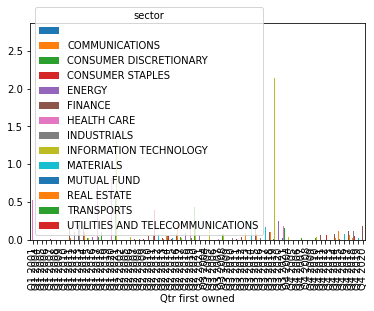

In [ ]:
#Graph1

df = pd.DataFrame(latest)
pl = df.pivot_table(
    index='Qtr first owned',
    columns='sector',
    values='% of Portfolio',
    aggfunc='sum',
).plot.bar()
pl

In [ ]:
#Graph2

df = (pd.DataFrame(latest)[['Symbol', 'Stock', '% of Portfolio', 'Previous % of Portfolio']].fillna(0)).rename(columns={"Symbol": "Sticker"})
df
df["% Change"] = df["% of Portfolio"] - df["Previous % of Portfolio"]
sells = (df.where(df["% Change"] < 0).dropna()).sort_values(by=["% Change"],ascending=True).head(10)
buys = (df.where(df["% Change"] >= 0).dropna()).sort_values(by=["% Change"],ascending=False).head(10)
sells
buys
max_buys_stocks = px.scatter(buys, x="Sticker", y="% Change", title = 'Maximum bought stocks',
                 color="Sticker", 
                 size='% Change',
                hover_name="Stock",
                 hover_data=['% Change','Sticker']).show() 
max_sells_stocks = px.scatter(sells, x="Sticker", y="% Change", title= 'Maximum sold stocks',
                 color="Sticker",
                 size=-sells['% Change'],
                hover_name="Stock",
                 hover_data=['% Change','Sticker']).show()